In [ ]:
#Задача обучения с учителем - бинарная классификация с целевой переменной - столбцом Label

In [2]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
from google.colab import files
uploaded = files.upload()

Saving test_weather.csv to test_weather (1).csv
Saving train_weather.csv to train_weather (1).csv


In [ ]:
#Загружаем и исследуем датафреймы

In [11]:
test = pd.read_csv("test_weather.csv")
train = pd.read_csv("train_weather.csv")

In [19]:
train

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Brisbane,13.7,23.6,0.0,5.0,9.6,SSE,24.0,SSW,ESE,7.0,9.0,65.0,53.0,1028.4,1026.7,1.0,1.0,18.3,22.3,0,0
1,Sydney,15.4,21.2,61.2,5.8,2.7,S,43.0,WSW,SSW,19.0,24.0,91.0,65.0,1018.8,1016.5,8.0,7.0,15.6,20.7,1,1
2,Richmond,16.8,30.9,1.0,NaN,NaN,NE,35.0,NNW,NE,7.0,26.0,80.0,38.0,1020.4,1013.2,1.0,NaN,19.6,30.0,0,0
3,NorfolkIsland,13.9,17.1,0.2,3.8,8.9,SE,37.0,SE,SSE,17.0,20.0,56.0,63.0,1027.7,1026.1,3.0,1.0,15.3,15.8,0,0
4,Mildura,16.0,36.1,0.0,6.8,12.9,ENE,33.0,ENE,E,17.0,19.0,58.0,32.0,1018.5,1016.0,0.0,3.0,26.0,34.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121868,GoldCoast,17.6,25.1,0.0,NaN,NaN,SSE,56.0,SE,E,9.0,19.0,58.0,58.0,1012.8,1010.2,NaN,NaN,23.5,24.2,0,0
121869,Adelaide,15.1,25.2,0.0,10.0,11.3,SW,48.0,S,WSW,11.0,28.0,55.0,41.0,1018.8,1018.3,NaN,NaN,19.0,24.6,0,0
121870,MountGinini,10.5,18.4,1.2,NaN,NaN,SSE,50.0,E,E,15.0,13.0,97.0,93.0,NaN,NaN,NaN,NaN,12.5,15.9,1,1
121871,Adelaide,13.6,19.8,2.6,NaN,7.5,WSW,54.0,WSW,WSW,11.0,20.0,76.0,46.0,1008.5,1007.4,NaN,NaN,14.4,18.9,1,1


In [ ]:
#заранее удаляем столбцы с локацией 
train.pop('Location')
test.pop('Location')

In [ ]:
print(train.shape)
print('---------------------')
print(train.columns.values)
print('---------------------')
print(train.dtypes)
print('---------------------')
print(train.isna().sum())


In [ ]:
print(test.head())
print('---------------------')
print(test.columns.values)
print('---------------------')
print(test.dtypes)
print('---------------------')
print(test.isna().sum())


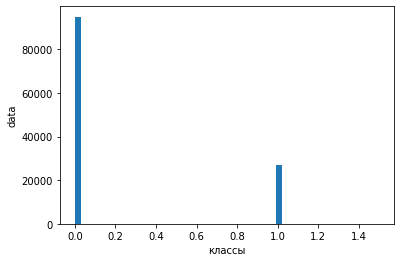

RainTomorrow
0    [[AxesSubplot(0.125,0.758226;0.158163x0.121774...
1    [[AxesSubplot(0.125,0.758226;0.158163x0.121774...
dtype: object

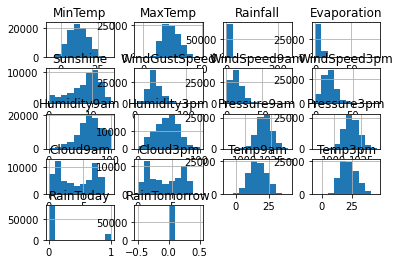

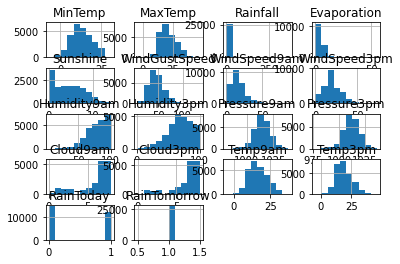

In [13]:
#гистограмма распределения данных

plt.hist(train.RainTomorrow, range=(train.RainTomorrow.min(), train.RainTomorrow.max()+0.5) , bins=50, alpha=1, ) 

plt.xlabel("классы") 
plt.ylabel("data") 
plt.show()

train.groupby('RainTomorrow').hist()

In [14]:
#преобразуем категориальные признаки

train = pd.get_dummies(train, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm'], prefix=["GustDir", "Dir9am","Dir3pm"])
test = pd.get_dummies(test, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm'], prefix=["GustDir", "Dir9am","Dir3pm"])

In [ ]:
#работа с NA 


stolbc = ['MinTemp','MaxTemp', 'Rainfall',
  'WindGustSpeed', 'WindSpeed9am',
  'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
  'Cloud9am', 'Cloud3pm' ,'Temp9am','Temp3pm', 'RainToday', 'RainTomorrow']

for i in stolbc:
  if (train[i].isna().sum() > 1000):
     train[train[i].isna()] = train[i].fillna(train[i].mean()) #хз как поправить эту строку, поэтому не использовал эту ячейку и сделал в следующей

train = train.drop(['Evaporation'], axis=1)
train = train.drop(['Sunshine'], axis=1)

In [15]:
train = train.drop(['Evaporation'], axis=1)
train = train.drop(['Sunshine'], axis=1)
test = test.drop(['Evaporation'], axis=1)
test = test.drop(['Sunshine'], axis=1)


train = train.fillna(train.mean())
test = test.fillna(test.mean())

распределение данных 

In [57]:
X = train.drop('RainTomorrow', axis=1)
y = train['RainTomorrow']
Ytest = test

нормализация/стандартизация

In [58]:
#standart
X = StandardScaler().fit_transform(X)
test_st = StandardScaler().fit_transform(test)

In [55]:
#Minmax
X = MinMaxScaler().fit_transform(X)
test_norm = MinMaxScaler().fit_transform(test)

Работа с моделями

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [ ]:
#логистическая регрессия
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression() 
logr.fit(X_train, y_train)
LR = logr.predict(test)
print(logr.score(X_test, y_test))

In [59]:
#Случайный лес

from sklearn.ensemble import RandomForestClassifier

RFС = RandomForestClassifier()
RFС.fit(X_train, y_train)
RFС_pred = RFС.predict(test)

print(RFС.score(X_test, y_test))

0.8485859635687326


In [56]:
#Лес решений

from sklearn.tree import DecisionTreeClassifier

DTC = RandomForestClassifier()
DTC.fit(X_train, y_train)
DTC_pred = DTC.predict(test)
print(DTC.score(X_test, y_test))

0.8496799956238718


In [50]:
#байесовский классификатор

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, y_train)
print(gnb.score(X_test, y_test))

gnb_pred= gnb.predict(test)

0.7219791039877469


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
print(knn.score(X_test, y_test))

knn_pred = knn.predict(test)

In [ ]:
!pip install catboost

In [ ]:
#в ответ беру случайный лес на обычных данных 

In [ ]:
#загрузка ответов 

res = pd.DataFrame({'index': [i for i in range(len(RFС_pred))],'RainTomorrow': RFС_pred})
res.to_csv('Weather prediction_Baklanov.csv', index=False)
files.download("Weather prediction_Baklanov.csv")